# Análisis  de los datos reducidos

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import math
from collections import Counter
from random import random
path = "./Datasets/Saber_reducido.csv"

In [2]:
def pertenece(a, b):
    for i in range(1,len(b)):
        if a>= b[i-1] and a<= b[i]:
            return i-1

def reemplazoGeneralizado(data):
    columns = ["ELECTRODOMESTICOS","ESTU_GENERO", "ESTU_FECHANACIMIENTO", "PERIODO", "ESTU_DEPTO_RESIDE", "FAMI_ESTRATOVIVIENDA", "FAMI_PERSONASHOGAR", "FAMI_CUARTOSHOGAR", "FAMI_EDUCACIONPADRE", "FAMI_EDUCACIONMADRE", "FAMI_TRABAJOLABORPADRE", "FAMI_TRABAJOLABORMADRE", "FAMI_NUMLIBROS", "FAMI_COMELECHEDERIVADOS", "FAMI_COMECARNEPESCADOHUEVO", "FAMI_COMECEREALFRUTOSLEGUMBRE", "ESTU_DEDICACIONLECTURADIARIA", "ESTU_DEDICACIONINTERNET", "COLE_NATURALEZA", "COLE_CARACTER", "COLE_AREA_UBICACION", "COLE_JORNADA","ESTU_NSE_INDIVIDUAL"]
    for c in columns:
        aux4 =0
        reemplazables = []
        if '-' in data.groupby(c).count().index:
            reemplazables.append(data.groupby(c).get_group('-').index.values)
        opciones = []
        porcentajes = [0]
        opciones.append(list(data.groupby(c).size().axes[0]))
        aux = len(opciones[0])
        if '-' in opciones[0]:
            opciones[0].remove('-')
            aux = aux-1
            aux2 = (data.groupby(c).size()['-']/data.shape[0])/aux
        else:
            continue
        for i in range(aux):
            aux3 = porcentajes.pop()
            porcentajes.append(aux3)
            a= float(data.groupby(c).size()[opciones[0][i]]/data.shape[0])+aux2+aux3
            porcentajes.append(a)
        if len(reemplazables) > 0:   
            for r in reemplazables[0]:
                randNumber = random()
                for j in range(len(opciones[0])):
                    lugar = pertenece(randNumber, porcentajes)
                    data.at[r, c] = opciones[0][lugar]

def puntajeGlobalCategorico(x):
    x=int(x)
    if x<=50:
        return 1
    elif x<=100:
        return 2
    elif x<=150:
        return 3
    elif x<=200:
        return 4
    elif x<=250:
        return 5
    elif x<=300:
        return 6
    elif x<=350:
        return 7
    elif x<=400:
        return 8
    elif x<=450:
        return 9
    else:
        return 10


def inseIndividualCategorico(x):
    x=int(x)
    if x<=5:
        return 1
    elif x<=10:
        return 2
    elif x<=15:
        return 3
    elif x<=20:
        return 4
    elif x<=25:
        return 5
    elif x<=30:
        return 6
    elif x<=35:
        return 7
    elif x<=40:
        return 8
    elif x<=45:
        return 9
    elif x<=50:
        return 10
    elif x<=55:
        return 11
    elif x<=60:
        return 12
    elif x<=65:
        return 13
    elif x<=70:
        return 14
    elif x<=75:
        return 15
    elif x<=80:
        return 16
    elif x<=85:
        return 17
    elif x<=90:
        return 18
    elif x<=95:
        return 19
    else:
        return 20

    
def puntajeCategorico(x):
    x=int(x)
    if x<=10:
        return 1
    elif x<=20:
        return 2
    elif x<=30:
        return 3
    elif x<=40:
        return 4
    elif x<=50:
        return 5
    elif x<=60:
        return 6
    elif x<=70:
        return 7
    elif x<=80:
        return 8
    elif x<=90:
        return 9
    else:
        return 10

    


In [3]:
def trabajoMadreToNumber(x):    
    if x == "Es agricultor, pesquero o jornalero":
        return 1
    if x == "Es dueño de un negocio grande, tiene un cargo de nivel directivo o gerencial":
        return 2
    if x == "Es dueño de un negocio pequeño (tiene pocos empleados o no tiene, por ejemplo tienda, papelería, etc":
        return 3
    if x == "Es operario de máquinas o conduce vehículos (taxita, chofer)":
        return 4
    if x == "Es vendedor o trabaja en atención al público":
        return 5
    if x == "No aplica":
        return 6
    if x == "No sabe":
        return 7
    if x == "Pensionado":
        return 8
    if x == "Tiene un trabajo de tipo auxiliar administrativo (por ejemplo, secretario o asistente)":
        return 9
    if x == "Trabaja como personal de limpieza, mantenimiento, seguridad o construcción":
        return 10
    if x == "Trabaja como profesional (por ejemplo médico, abogado, ingeniero)":
        return 11
    if x == "Trabaja en el hogar, no trabaja o estudia":
        return 12
    if x == "Trabaja por cuenta propia (por ejemplo plomero, electricista)":
        return 13
    else:
        return -1


def educacionToNumber(x):

    if x == "Educación profesional completa":
        return 1
    if x == "Educación profesional incompleta":
        return 2
    if x == "Ninguno":
        return 3
    if x == "No Aplica":
        return 4
    if x == "No sabe":
        return 5
    if x == "Postgrado":
        return 6
    if x == "Primaria completa":
        return 7
    if x == "Primaria incompleta":
        return 8
    if x == "Secundaria (Bachillerato) completa":
        return 9
    if x == "Secundaria (Bachillerato) incompleta":
        return 10
    if x == "Técnica o tecnológica completa":
        return 11
    if x == "Técnica o tecnológica incompleta":
        return 12
    else:
        return x

def foodToNumber(x):
    if x == "1 o 2 veces por semana":
        return 1
    if x == "3 a 5 veces por semana":
        return 2
    if x == "Nunca o rara vez comemos eso":
        return 3
    if x == "Todos o casi todos los días":
        return 4
        
def lectureToNumber(x):
    if x == "30 minutos o menos":
        return 1
    if x == "Entre 1 y 2 horas":
        return 2
    if x == "Entre 30 y 60 minutos":
        return 3
    if x == "Más de 2 horas":
        return 4
    if x == "No leo por entretenimiento":
        return 5
    
def internetToNumber(x):
    if x == "30 minutos o menos":
        return 1
    if x == "Entre 1 y 3 horas":
        return 2
    if x == "Entre 30 y 60 minutos":
        return 3
    if x == "Más de 3 horas":
        return 4
    if x == "No Navega Internet":
        return 5

In [4]:
Keys = ["ELECTRODOMESTICOS","ESTU_GENERO", "ESTU_FECHANACIMIENTO", "PERIODO", "ESTU_DEPTO_RESIDE", "FAMI_ESTRATOVIVIENDA", "FAMI_PERSONASHOGAR", "FAMI_CUARTOSHOGAR", "FAMI_EDUCACIONPADRE", "FAMI_EDUCACIONMADRE", "FAMI_TRABAJOLABORPADRE", "FAMI_TRABAJOLABORMADRE", "FAMI_NUMLIBROS", "FAMI_COMELECHEDERIVADOS", "FAMI_COMECARNEPESCADOHUEVO", "FAMI_COMECEREALFRUTOSLEGUMBRE", "ESTU_DEDICACIONLECTURADIARIA", "ESTU_DEDICACIONINTERNET", "COLE_NATURALEZA", "COLE_CARACTER", "COLE_AREA_UBICACION", "COLE_JORNADA", "PUNT_LECTURA_CRITICA", "PUNT_MATEMATICAS", "PUNT_C_NATURALES", "PUNT_SOCIALES_CIUDADANAS", "PUNT_INGLES", "PUNT_GLOBAL", "ESTU_NSE_ESTABLECIMIENTO", "ESTU_INSE_INDIVIDUAL", "ESTU_NSE_INDIVIDUAL"]

In [5]:
tmp = ["ESTU_GENERO","ESTU_FECHANACIMIENTO","PERIODO","ESTU_DEPTO_RESIDE","FAMI_ESTRATOVIVIENDA","FAMI_PERSONASHOGAR","FAMI_CUARTOSHOGAR","FAMI_EDUCACIONPADRE","FAMI_EDUCACIONMADRE","FAMI_TRABAJOLABORPADRE","FAMI_TRABAJOLABORMADRE","FAMI_TIENESERVICIOTV","FAMI_TIENECOMPUTADOR","FAMI_TIENEAUTOMOVIL","FAMI_TIENEMOTOCICLETA","FAMI_TIENECONSOLAVIDEOJUEGOS","FAMI_NUMLIBROS","FAMI_COMELECHEDERIVADOS","FAMI_COMECARNEPESCADOHUEVO","FAMI_COMECEREALFRUTOSLEGUMBRE","FAMI_SITUACIONECONOMICA","ESTU_DEDICACIONLECTURADIARIA ","ESTU_DEDICACIONINTERNET","COLE_NOMBRE_ESTABLECIMIENTO","COLE_NATURALEZA COLE_BILINGUE","COLE_CARACTER","COLE_AREA_UBICACION","COLE_JORNADA","PUNT_LECTURA_CRITICA","PERCENTIL_LECTURA_CRITICA","PUNT_MATEMATICAS","PERCENTIL_MATEMATICAS","PUNT_C_NATURALES","PERCENTIL_C_NATURALES","PUNT_SOCIALES_CIUDADANAS","PERCENTIL_SOCIALES_CIUDADANAS","PUNT_INGLES","PERCENTIL_INGLES","PUNT_GLOBAL","PERCENTIL_GLOBAL","ESTU_NSE_ESTABLECIMIENTO","ESTU_INSE_INDIVIDUAL","ESTU_NSE_INDIVIDUAL",
]

for element in Keys:
    if element not in tmp:
        print(element)


ELECTRODOMESTICOS
ESTU_DEDICACIONLECTURADIARIA
COLE_NATURALEZA


In [6]:
data = pd.read_csv(path, low_memory=False)

In [7]:
reemplazoGeneralizado(data)

## Discretizacion ESTU_INSE_INDIVIDUAL

In [8]:
# to integer
data['ESTU_INSE_INDIVIDUAL'] = data.apply(lambda x: round(x['ESTU_INSE_INDIVIDUAL'], 0),axis=1)

In [9]:
data.head()

,ELECTRODOMESTICOS,ESTU_GENERO,ESTU_FECHANACIMIENTO,PERIODO,ESTU_DEPTO_RESIDE,FAMI_ESTRATOVIVIENDA,FAMI_PERSONASHOGAR,FAMI_CUARTOSHOGAR,FAMI_EDUCACIONPADRE,FAMI_EDUCACIONMADRE,...,COLE_JORNADA,PUNT_LECTURA_CRITICA,PUNT_MATEMATICAS,PUNT_C_NATURALES,PUNT_SOCIALES_CIUDADANAS,PUNT_INGLES,PUNT_GLOBAL,ESTU_NSE_ESTABLECIMIENTO,ESTU_INSE_INDIVIDUAL,ESTU_NSE_INDIVIDUAL
0,10010,M,16,20182,ATLANTICO,Estrato 2,7 a 8,Cuatro,No sabe,No sabe,...,MAÑANA,63,69,54,57,65.0,305,2.0,53.0,NSE3
1,10010,M,17,20182,CORDOBA,Estrato 1,5 a 6,Dos,Secundaria (Bachillerato) completa,Primaria completa,...,UNICA,54,50,50,40,48.0,242,2.0,45.0,NSE2
2,0,M,16,20182,VALLE,Estrato 2,1 a 2,Dos,No sabe,Técnica o tecnológica incompleta,...,MAÑANA,59,43,46,45,47.0,241,2.0,45.0,NSE2
3,11101,M,17,20182,BOYACA,Estrato 3,3 a 4,Tres,No sabe,Educación profesional completa,...,MAÑANA,61,60,60,67,63.0,310,3.0,74.0,NSE4
4,10000,M,19,20182,BOGOTA,Estrato 2,7 a 8,Tres,No sabe,No sabe,...,COMPLETA,56,51,48,49,56.0,257,3.0,49.0,NSE2


In [10]:
data.iloc[0]

ELECTRODOMESTICOS                                                       10010
ESTU_GENERO                                                                 M
ESTU_FECHANACIMIENTO                                                       16
PERIODO                                                                 20182
ESTU_DEPTO_RESIDE                                                   ATLANTICO
FAMI_ESTRATOVIVIENDA                                                Estrato 2
FAMI_PERSONASHOGAR                                                      7 a 8
FAMI_CUARTOSHOGAR                                                      Cuatro
FAMI_EDUCACIONPADRE                                                   No sabe
FAMI_EDUCACIONMADRE                                                   No sabe
FAMI_TRABAJOLABORPADRE           Es vendedor o trabaja en atención al público
FAMI_TRABAJOLABORMADRE           Es vendedor o trabaja en atención al público
FAMI_NUMLIBROS                                                26

In [11]:
data.groupby("ESTU_NSE_INDIVIDUAL").size()  

ESTU_NSE_INDIVIDUAL
NSE1    164554
NSE2    394442
NSE3    375020
NSE4     81303
dtype: int64

In [12]:
type(data.groupby("FAMI_NUMLIBROS").size())

pandas.core.series.Series

In [13]:
#data.groupby("ESTU_GENERO").get_group('-').index.values

In [14]:
data.groupby("FAMI_TRABAJOLABORMADRE").size() 

FAMI_TRABAJOLABORMADRE
Es agricultor, pesquero o jornalero                                                                      28812
Es dueño de un negocio grande, tiene un cargo de nivel directivo o gerencial                             15172
Es dueño de un negocio pequeño (tiene pocos empleados o no tiene, por ejemplo tienda, papelería, etc     87746
Es operario de máquinas o conduce vehículos (taxita, chofer)                                             16740
Es vendedor o trabaja en atención al público                                                             79040
No aplica                                                                                                48297
No sabe                                                                                                  25112
Pensionado                                                                                                6712
Tiene un trabajo de tipo auxiliar administrativo (por ejemplo, secretario o asistente)   

In [15]:
data.groupby("FAMI_EDUCACIONMADRE").size()

FAMI_EDUCACIONMADRE
Educación profesional completa          104871
Educación profesional incompleta         24789
Ninguno                                  21272
No Aplica                                 1766
No sabe                                  17688
Postgrado                                21267
Primaria completa                       112505
Primaria incompleta                     158074
Secundaria (Bachillerato) completa      261921
Secundaria (Bachillerato) incompleta    157367
Técnica o tecnológica completa          102579
Técnica o tecnológica incompleta         31220
dtype: int64

In [16]:
data.groupby("FAMI_EDUCACIONPADRE").size()

FAMI_EDUCACIONPADRE
Educación profesional completa           92355
Educación profesional incompleta         20235
Ninguno                                  34424
No Aplica                                10261
No sabe                                  62935
Postgrado                                18687
Primaria completa                       111466
Primaria incompleta                     201021
Secundaria (Bachillerato) completa      226238
Secundaria (Bachillerato) incompleta    146890
Técnica o tecnológica completa           69729
Técnica o tecnológica incompleta         21078
dtype: int64

In [17]:
data.groupby("FAMI_CUARTOSHOGAR").size()

FAMI_CUARTOSHOGAR
Cinco          41025
Cuatro        134507
Dos           365401
Seis o mas     21868
Tres          399684
Uno            52834
dtype: int64

In [18]:
data.groupby("FAMI_PERSONASHOGAR").size()

FAMI_PERSONASHOGAR
1 a 2       73632
3 a 4      485239
5 a 6      332202
7 a 8       88696
9 o más     35550
dtype: int64

## Histogramas

In [19]:
data.groupby("COLE_JORNADA").size()

COLE_JORNADA
COMPLETA    184979
MAÑANA      523472
NOCHE        48127
SABATINA     53347
TARDE       132572
UNICA        72822
dtype: int64

In [20]:
data.groupby("FAMI_ESTRATOVIVIENDA").size()/data.shape[0] * 100

FAMI_ESTRATOVIVIENDA
Estrato 1      33.231132
Estrato 2      36.629473
Estrato 3      20.492180
Estrato 4       4.705221
Estrato 5       1.550843
Estrato 6       0.745086
Sin Estrato     2.646065
dtype: float64

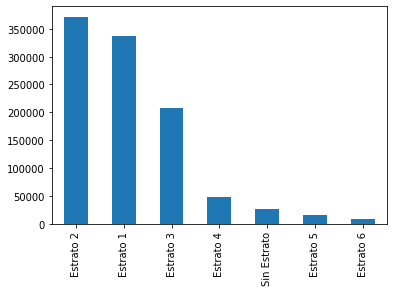

In [21]:
data['FAMI_ESTRATOVIVIENDA'].value_counts().plot(kind='bar')

In [22]:
data.groupby("ESTU_FECHANACIMIENTO").size()

ESTU_FECHANACIMIENTO
14      1376
15     37302
16    373165
17    336231
18    167616
19     63029
20     21248
21      9541
22      5811
dtype: int64

<class 'matplotlib.axes._subplots.AxesSubplot'>


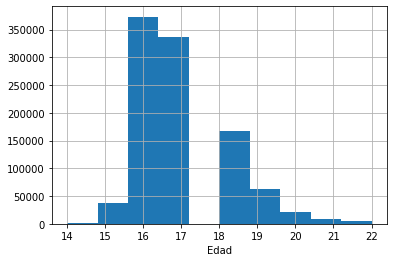

In [23]:
hist = data["ESTU_FECHANACIMIENTO"].hist()
hist.set_xlabel("Edad")
print(type(hist))

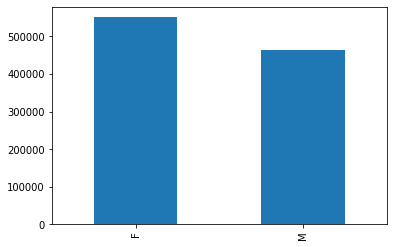

In [24]:
data['ESTU_GENERO'].value_counts().plot(kind='bar')

In [25]:
#data.groupby("ESTU_INSE_INDIVIDUAL").size()
print("min",data["ESTU_INSE_INDIVIDUAL"].min())
print("max",data["ESTU_INSE_INDIVIDUAL"].max())


min 13.0
max 85.0


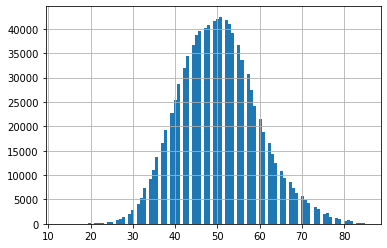

In [26]:
data['ESTU_INSE_INDIVIDUAL'].hist(bins = 100)

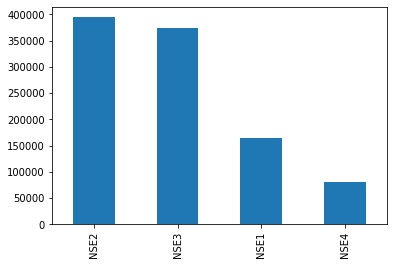

In [27]:
data["ESTU_NSE_INDIVIDUAL"].value_counts().plot(kind ='bar')

In [28]:
data.groupby("ESTU_NSE_INDIVIDUAL").size()

ESTU_NSE_INDIVIDUAL
NSE1    164554
NSE2    394442
NSE3    375020
NSE4     81303
dtype: int64

In [29]:
n = len(data.groupby("ESTU_NSE_ESTABLECIMIENTO").size())
for i in range(1,n+1):
    print(data.groupby("ESTU_NSE_ESTABLECIMIENTO").size()[i])

72076
545146
351248
45744


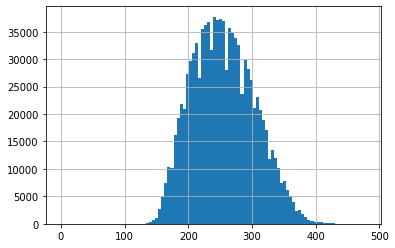

In [30]:
data["PUNT_GLOBAL"].hist(bins = 100)

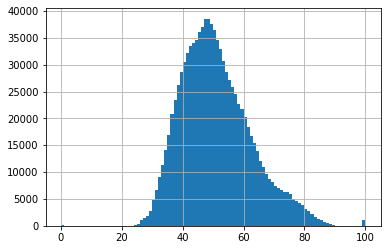

In [31]:
data["PUNT_INGLES"].hist(bins = 100)

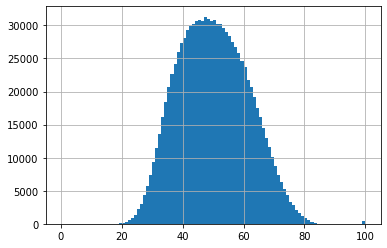

In [32]:
data["PUNT_SOCIALES_CIUDADANAS"].hist(bins = 100)

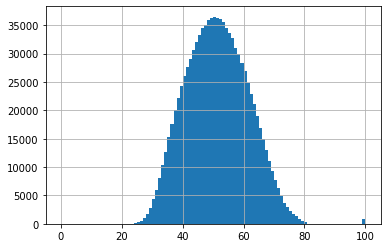

In [33]:
data["PUNT_C_NATURALES"].hist(bins = 100)

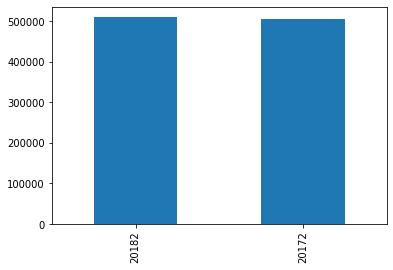

In [34]:
data["PERIODO"].value_counts().plot(kind ='bar')

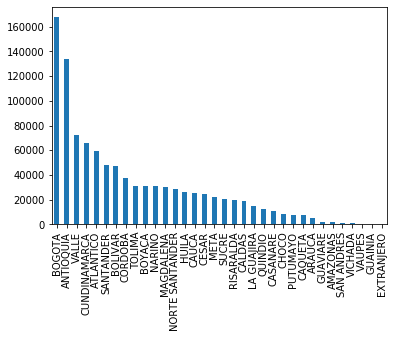

In [35]:
data["ESTU_DEPTO_RESIDE"].value_counts().plot(kind ='bar')

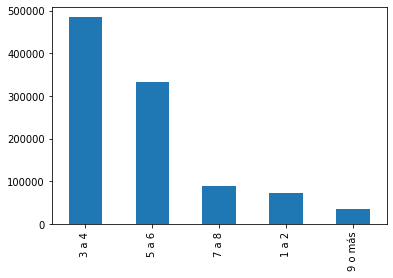

In [36]:
data["FAMI_PERSONASHOGAR"].value_counts().plot(kind ='bar')

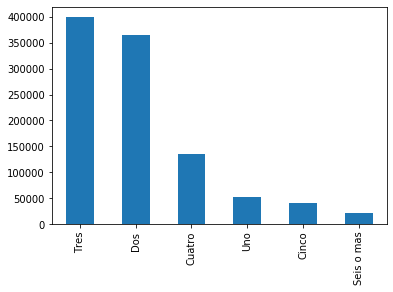

In [37]:
data["FAMI_CUARTOSHOGAR"].value_counts().plot(kind ='bar')

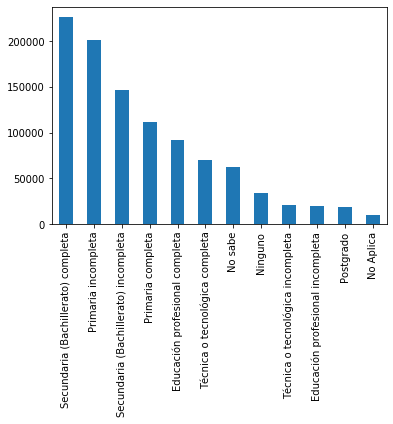

In [38]:
data["FAMI_EDUCACIONPADRE"].value_counts().plot(kind ='bar')

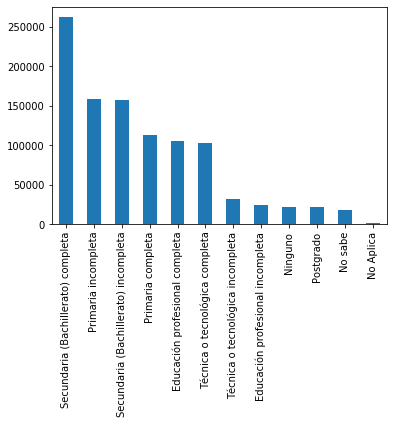

In [39]:
data["FAMI_EDUCACIONMADRE"].value_counts().plot(kind ='bar')

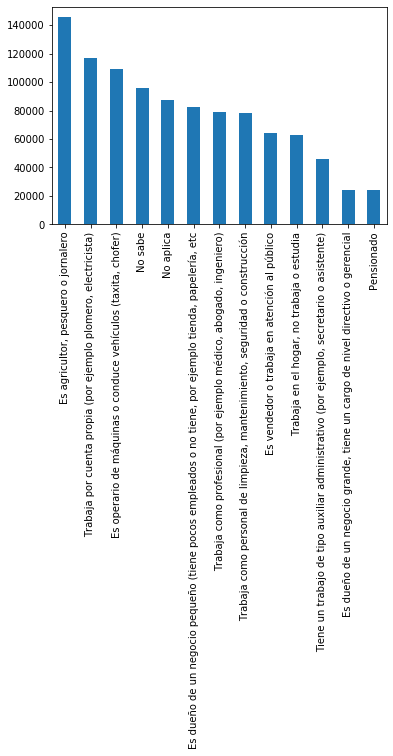

In [40]:
data["FAMI_TRABAJOLABORPADRE"].value_counts().plot(kind ='bar')


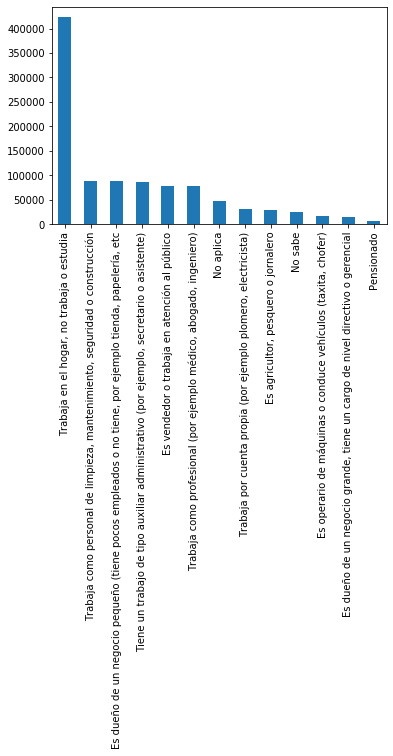

In [41]:
data["FAMI_TRABAJOLABORMADRE"].value_counts().plot(kind ='bar')

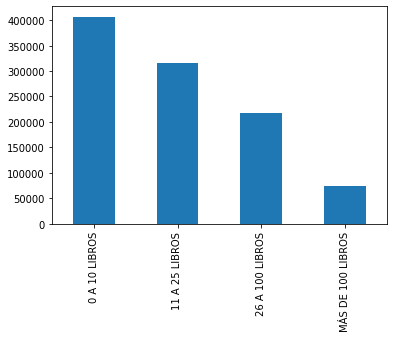

In [42]:
data["FAMI_NUMLIBROS"].value_counts().plot(kind ='bar')

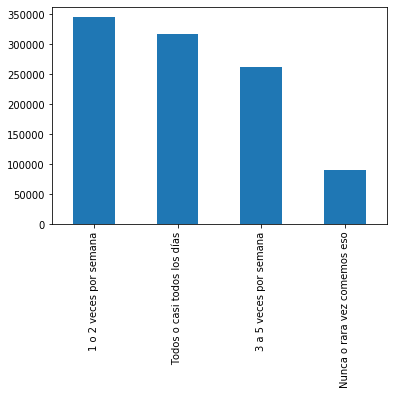

In [43]:
data["FAMI_COMELECHEDERIVADOS"].value_counts().plot(kind ='bar')

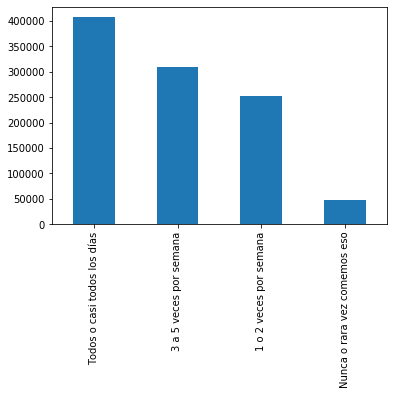

In [44]:
data["FAMI_COMECARNEPESCADOHUEVO"].value_counts().plot(kind ='bar')

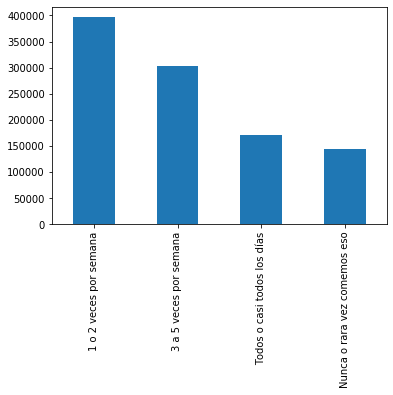

In [45]:
data["FAMI_COMECEREALFRUTOSLEGUMBRE"].value_counts().plot(kind ='bar')

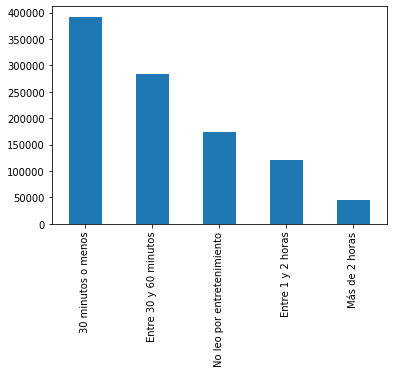

In [46]:
data["ESTU_DEDICACIONLECTURADIARIA"].value_counts().plot(kind ='bar')

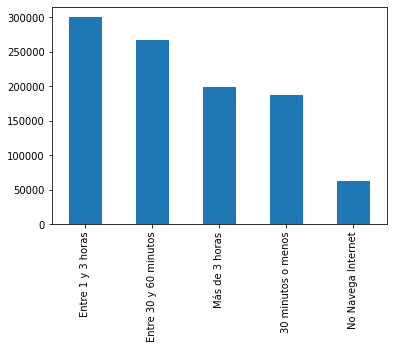

In [47]:
data["ESTU_DEDICACIONINTERNET"].value_counts().plot(kind ='bar')

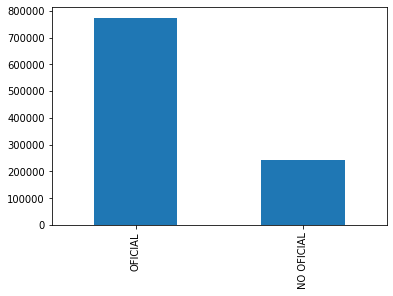

In [48]:
data["COLE_NATURALEZA"].value_counts().plot(kind ='bar')

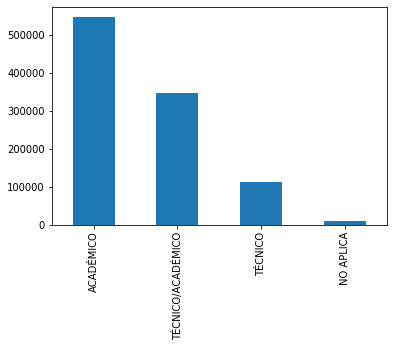

In [49]:
data["COLE_CARACTER"].value_counts().plot(kind ='bar')

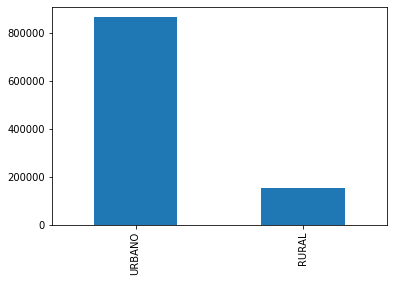

In [50]:
data["COLE_AREA_UBICACION"].value_counts().plot(kind ='bar')

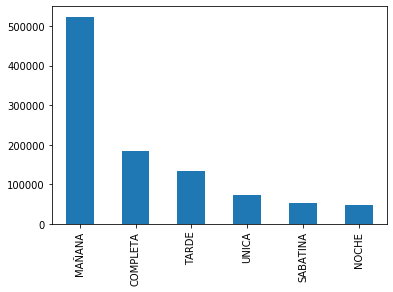

In [51]:
data["COLE_JORNADA"].value_counts().plot(kind ='bar')

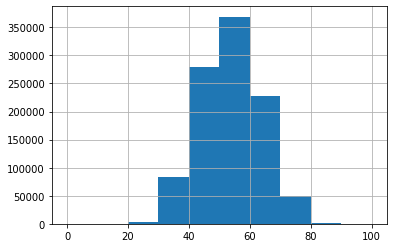

In [52]:
data["PUNT_LECTURA_CRITICA"].hist()

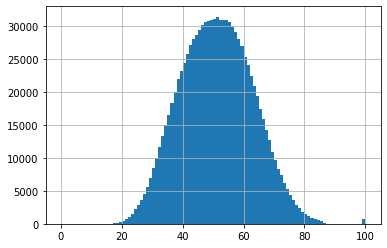

In [53]:
data["PUNT_MATEMATICAS"].hist(bins = 100)

In [54]:
#data.groupby("PUNT_MATEMATICAS").size()

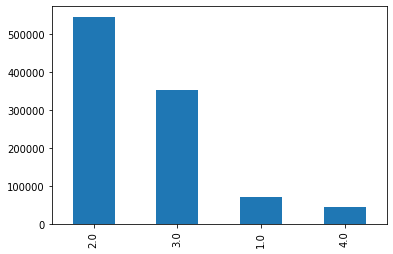

In [55]:
data["ESTU_NSE_ESTABLECIMIENTO"].value_counts().plot(kind ='bar')

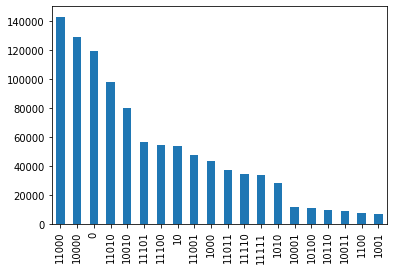

In [56]:
data["ELECTRODOMESTICOS"].value_counts().plot(kind ='bar')

In [57]:
data.groupby("ELECTRODOMESTICOS").size().sort_values(ascending=False)/data.shape[0]*100

ELECTRODOMESTICOS
11000    14.087395
10000    12.695222
0        11.784966
11010     9.678732
10010     7.873683
11101     5.564458
11100     5.365407
10        5.284349
11001     4.715168
1000      4.273238
11011     3.668896
11110     3.372044
11111     3.341314
1010      2.773611
10001     1.161901
10100     1.081335
10110     0.959994
10011     0.912915
1100      0.755231
1001      0.650140
dtype: float64

In [58]:
data.shape

(1015319, 31)

## Correlacion de pearson

In [59]:
print(data.PUNT_GLOBAL.corr(data.ESTU_INSE_INDIVIDUAL, method="pearson"))

0.4348155519188581


In [60]:
data.corr(method="pearson")

,ELECTRODOMESTICOS,ESTU_FECHANACIMIENTO,PERIODO,PUNT_LECTURA_CRITICA,PUNT_MATEMATICAS,PUNT_C_NATURALES,PUNT_SOCIALES_CIUDADANAS,PUNT_INGLES,PUNT_GLOBAL,ESTU_NSE_ESTABLECIMIENTO,ESTU_INSE_INDIVIDUAL
ELECTRODOMESTICOS,1.000000,-0.131716,0.006306,0.161448,0.163551,0.163479,0.148608,0.205841,0.181479,0.307328,0.519097
ESTU_FECHANACIMIENTO,-0.131716,1.000000,-0.003332,-0.262915,-0.301661,-0.288391,-0.243595,-0.265464,-0.304825,-0.150855,-0.230079
PERIODO,0.006306,-0.003332,1.000000,-0.033390,0.004813,-0.084233,-0.089920,0.046766,-0.046865,0.022286,-0.018477
PUNT_LECTURA_CRITICA,0.161448,-0.262915,-0.033390,1.000000,0.735875,0.749057,0.801586,0.659955,0.895540,0.382571,0.388413
PUNT_MATEMATICAS,0.163551,-0.301661,0.004813,0.735875,1.000000,0.797961,0.743861,0.662148,0.903941,0.373868,0.382414
PUNT_C_NATURALES,0.163479,-0.288391,-0.084233,0.749057,0.797961,1.000000,0.797822,0.680637,0.915557,0.360940,0.376194
PUNT_SOCIALES_CIUDADANAS,0.148608,-0.243595,-0.089920,0.801586,0.743861,0.797822,1.000000,0.669289,0.917890,0.370963,0.379605
PUNT_INGLES,0.205841,-0.265464,0.046766,0.659955,0.662148,0.680637,0.669289,1.000000,0.774099,0.471297,0.488795
PUNT_GLOBAL,0.181479,-0.304825,-0.046865,0.895540,0.903941,0.915557,0.917890,0.774099,1.000000,0.423465,0.434816
ESTU_NSE_ESTABLECIMIENTO,0.307328,-0.150855,0.022286,0.382571,0.373868,0.360940,0.370963,0.471297,0.423465,1.000000,0.630593


## Diagramas de caja

Text(0.5, 0, 'Edad')

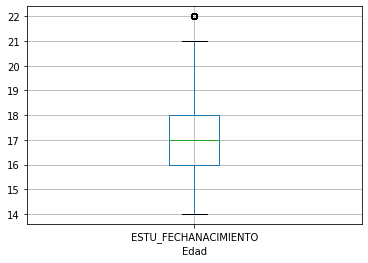

In [61]:
hist = data.boxplot(column=['ESTU_FECHANACIMIENTO'])
hist.set_xlabel("Edad")

In [62]:
dataAge = data[data['ESTU_FECHANACIMIENTO'] > 22]
dataAge.groupby("ESTU_FECHANACIMIENTO").size()/data.shape[0]*100

Series([], dtype: float64)

## Tablas de contingencia

In [63]:
pd.crosstab(data['FAMI_EDUCACIONPADRE'], [data['FAMI_EDUCACIONMADRE']])/data.shape[0]*100

FAMI_EDUCACIONMADRE,Educación profesional completa,Educación profesional incompleta,Ninguno,No Aplica,No sabe,Postgrado,Primaria completa,Primaria incompleta,Secundaria (Bachillerato) completa,Secundaria (Bachillerato) incompleta,Técnica o tecnológica completa,Técnica o tecnológica incompleta
FAMI_EDUCACIONPADRE,,,,,,,,,,,,
Educación profesional completa,3.963286,0.539239,0.027972,0.014084,0.113462,0.442620,0.187724,0.216484,1.516174,0.509791,1.295652,0.269669
Educación profesional incompleta,0.442324,0.329946,0.008766,0.006402,0.024524,0.094847,0.058110,0.056534,0.393669,0.166253,0.310444,0.101150
Ninguno,0.067269,0.022850,0.821614,0.007485,0.028168,0.010145,0.454734,0.994663,0.423414,0.429717,0.081748,0.048655
No Aplica,0.108537,0.028267,0.014380,0.043927,0.018615,0.029350,0.095930,0.128236,0.244849,0.142911,0.120849,0.034767
No sabe,0.606213,0.155912,0.057716,0.013296,0.916067,0.107454,0.508215,0.688552,1.468898,0.878837,0.629359,0.168026
Postgrado,0.508018,0.086081,0.004826,0.005023,0.020880,0.757791,0.024918,0.027972,0.147540,0.050329,0.171375,0.035752
Primaria completa,0.328862,0.088544,0.215794,0.010637,0.079088,0.044912,3.520470,1.839126,2.429286,1.715224,0.522693,0.183785
Primaria incompleta,0.424990,0.117205,0.588682,0.017630,0.120356,0.057519,3.048599,8.189150,3.189441,3.108383,0.692886,0.243963
Secundaria (Bachillerato) completa,1.842081,0.474038,0.145964,0.024426,0.199839,0.239629,1.491551,1.454912,10.117116,2.969806,2.517731,0.805363


In [64]:
pd.crosstab(data['FAMI_ESTRATOVIVIENDA'], [data['FAMI_PERSONASHOGAR']])/data.shape[0]*100


FAMI_PERSONASHOGAR,1 a 2,3 a 4,5 a 6,7 a 8,9 o más
FAMI_ESTRATOVIVIENDA,,,,,
Estrato 1,2.168186,14.029187,11.969736,3.669093,1.394931
Estrato 2,2.701023,18.082199,11.847508,2.877027,1.121716
Estrato 3,1.628454,10.932131,6.022836,1.344701,0.564059
Estrato 4,0.392192,2.664778,1.269256,0.265237,0.113757
Estrato 5,0.132274,0.833728,0.440453,0.101347,0.043041
Estrato 6,0.056435,0.362152,0.223772,0.064216,0.038510
Sin Estrato,0.173542,0.887603,0.945417,0.414156,0.225348


In [65]:
pd.crosstab(data['FAMI_ESTRATOVIVIENDA'], [data['ESTU_NSE_INDIVIDUAL']])/data.shape[0] * 100

ESTU_NSE_INDIVIDUAL,NSE1,NSE2,NSE3,NSE4
FAMI_ESTRATOVIVIENDA,,,,
Estrato 1,10.160058,16.569078,6.204848,0.297148
Estrato 2,3.624181,15.209998,16.371702,1.423592
Estrato 3,0.856578,4.563787,11.724492,3.347322
Estrato 4,0.243766,0.783399,1.751863,1.926193
Estrato 5,0.110113,0.340287,0.400662,0.699780
Estrato 6,0.074361,0.227318,0.162018,0.281389
Sin Estrato,1.138066,1.155203,0.320589,0.032207


In [66]:
pd.crosstab(data['FAMI_ESTRATOVIVIENDA'], [data['COLE_AREA_UBICACION']])/data.shape[0] * 100

COLE_AREA_UBICACION,RURAL,URBANO
FAMI_ESTRATOVIVIENDA,,
Estrato 1,7.472430,25.758702
Estrato 2,4.033806,32.595667
Estrato 3,1.472641,19.019540
Estrato 4,0.519443,4.185778
Estrato 5,0.226136,1.324707
Estrato 6,0.141729,0.603357
Sin Estrato,1.109799,1.536266


In [67]:
pd.crosstab(data['FAMI_ESTRATOVIVIENDA'], [data['ESTU_FECHANACIMIENTO']])

ESTU_FECHANACIMIENTO,14,15,16,17,18,19,20,21,22
FAMI_ESTRATOVIVIENDA,,,,,,,,,
Estrato 1,516,13173,113349,109769,60033,24672,9143,4201,2546
Estrato 2,454,13873,142786,122529,59571,21418,6612,2872,1791
Estrato 3,256,7260,83595,70324,31322,10358,2972,1222,752
Estrato 4,72,1523,19075,16726,6910,2248,705,306,208
Estrato 5,22,398,5299,5929,2665,893,315,139,86
Estrato 6,6,163,2081,2753,1596,566,232,117,51
Sin Estrato,50,912,6980,8201,5519,2874,1269,684,377


In [68]:
pd.crosstab(data['FAMI_ESTRATOVIVIENDA'], [data['FAMI_NUMLIBROS']])

FAMI_NUMLIBROS,0 A 10 LIBROS,11 A 25 LIBROS,26 A 100 LIBROS,MÁS DE 100 LIBROS
FAMI_ESTRATOVIVIENDA,,,,
Estrato 1,174232,100329,49460,13381
Estrato 2,143516,123102,81749,23539
Estrato 3,58958,65970,60555,22578
Estrato 4,10165,13064,15947,8597
Estrato 5,3324,3927,5232,3263
Estrato 6,1825,1848,2194,1698
Sin Estrato,14955,7061,3297,1553


## Diagramas de dispersion

Text(0, 0.5, 'ESTU_INSE_INDIVIDUAL')

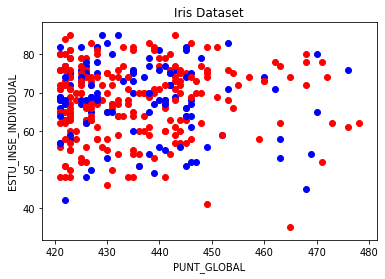

In [69]:
colors = {'M':'r', 'F':'b'}
fig, ax = plt.subplots()
for i in range(1000000):
    if data['PUNT_GLOBAL'][i] > 420:
        ax.scatter(data['PUNT_GLOBAL'][i], data['ESTU_INSE_INDIVIDUAL'][i],color=colors[data['ESTU_GENERO'][i]])
ax.set_title('Iris Dataset')
ax.set_xlabel('PUNT_GLOBAL')
ax.set_ylabel('ESTU_INSE_INDIVIDUAL')

Text(0, 0.5, 'ESTU_INSE_INDIVIDUAL')

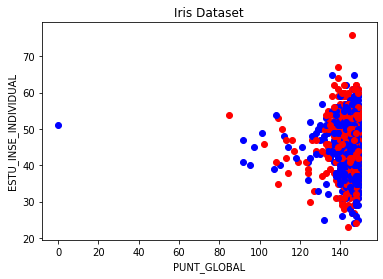

In [70]:
colors = {'M':'r', 'F':'b'}
fig, ax = plt.subplots()
for i in range(1000000):
    if data['PUNT_GLOBAL'][i] < 150:
        ax.scatter(data['PUNT_GLOBAL'][i], data['ESTU_INSE_INDIVIDUAL'][i],color=colors[data['ESTU_GENERO'][i]])
ax.set_title('Iris Dataset')
ax.set_xlabel('PUNT_GLOBAL')
ax.set_ylabel('ESTU_INSE_INDIVIDUAL')

# Entropia

In [71]:
columnEval = ["FAMI_TIENESERVICIOTV","FAMI_TIENECOMPUTADOR","FAMI_TIENEAUTOMOVIL","FAMI_TIENEMOTOCICLETA","FAMI_TIENECONSOLAVIDEOJUEGOS"]

In [72]:
def EntropySum(n):
    if n == 0:
        return 0
    if n == 1:
        return 0
    else:
        return n*math.log(n,2)+(1-n)*math.log(1-n,2)

def compare(i,j,colPass):
    count = 0
    for col in columnEval:
        if data.iloc[i][col] == data.iloc[j][col]:
            if col != colPass:
                count+=1
    return count

In [73]:
entropy = 0
dataSize = 1000 #data.shape[0]

"""
for i in range(dataSize):
    for j in range(i+1,dataSize):
        result = compare(i, j, "")
        entropy += EntropySum(result/data.shape[1])
        #if j%100 == 0:
        #    print("R",i,j,"=",result)
    print("R",i,j,"=",entropy)
print("EntropyTotal",entropy*-1)
"""


'\nfor i in range(dataSize):\n    for j in range(i+1,dataSize):\n        result = compare(i, j, "")\n        entropy += EntropySum(result/data.shape[1])\n        #if j%100 == 0:\n        #    print("R",i,j,"=",result)\n    print("R",i,j,"=",entropy)\nprint("EntropyTotal",entropy*-1)\n'

## crear csv para k-modes transformar todos los datos en categoricos

In [74]:
#data.groupby("PUNT_GLOBAL").size()

In [75]:
data["ESTU_INSE_INDIVIDUAL"] = data["ESTU_INSE_INDIVIDUAL"].fillna(50.0)

In [76]:
data["PUNT_INGLES"] = data["PUNT_INGLES"].fillna(50.0)

In [77]:
data["ESTU_NSE_ESTABLECIMIENTO"] = data["ESTU_NSE_ESTABLECIMIENTO"].fillna(2.0)
#data.groupby("ESTU_NSE_ESTABLECIMIENTO").size()

In [78]:
data["PUNT_GLOBAL"] = data.apply(lambda x: puntajeGlobalCategorico(x["PUNT_GLOBAL"]),axis=1 )

In [79]:
data["PUNT_LECTURA_CRITICA"] = data.apply(lambda x: puntajeCategorico(x["PUNT_LECTURA_CRITICA"]),axis=1 )

In [80]:
data["PUNT_MATEMATICAS"] = data.apply(lambda x: puntajeCategorico(x["PUNT_MATEMATICAS"]),axis=1 )

In [81]:
data["PUNT_C_NATURALES"] = data.apply(lambda x: puntajeCategorico(x["PUNT_C_NATURALES"]),axis=1 )

In [82]:
data["PUNT_SOCIALES_CIUDADANAS"] = data.apply(lambda x: puntajeCategorico(x["PUNT_SOCIALES_CIUDADANAS"]),axis=1 )

In [83]:
data["PUNT_INGLES"] = data.apply(lambda x: puntajeCategorico(x["PUNT_INGLES"]),axis=1 )

In [84]:
data["ESTU_INSE_INDIVIDUAL"] = data.apply(lambda x: inseIndividualCategorico(x["ESTU_INSE_INDIVIDUAL"]),axis=1 ) 

In [85]:
data.groupby("ESTU_INSE_INDIVIDUAL").size()

ESTU_INSE_INDIVIDUAL
3         15
4        147
5       1181
6       8142
7      36870
8      97511
9     170400
10    225940
11    201013
12    137467
13     73095
14     37439
15     17717
16      6360
17      2022
dtype: int64

In [86]:
data.groupby("ESTU_NSE_INDIVIDUAL").size()

ESTU_NSE_INDIVIDUAL
NSE1    164554
NSE2    394442
NSE3    375020
NSE4     81303
dtype: int64

In [87]:
data.head()

,ELECTRODOMESTICOS,ESTU_GENERO,ESTU_FECHANACIMIENTO,PERIODO,ESTU_DEPTO_RESIDE,FAMI_ESTRATOVIVIENDA,FAMI_PERSONASHOGAR,FAMI_CUARTOSHOGAR,FAMI_EDUCACIONPADRE,FAMI_EDUCACIONMADRE,...,COLE_JORNADA,PUNT_LECTURA_CRITICA,PUNT_MATEMATICAS,PUNT_C_NATURALES,PUNT_SOCIALES_CIUDADANAS,PUNT_INGLES,PUNT_GLOBAL,ESTU_NSE_ESTABLECIMIENTO,ESTU_INSE_INDIVIDUAL,ESTU_NSE_INDIVIDUAL
0,10010,M,16,20182,ATLANTICO,Estrato 2,7 a 8,Cuatro,No sabe,No sabe,...,MAÑANA,7,7,6,6,7,7,2.0,11,NSE3
1,10010,M,17,20182,CORDOBA,Estrato 1,5 a 6,Dos,Secundaria (Bachillerato) completa,Primaria completa,...,UNICA,6,5,5,4,5,5,2.0,9,NSE2
2,0,M,16,20182,VALLE,Estrato 2,1 a 2,Dos,No sabe,Técnica o tecnológica incompleta,...,MAÑANA,6,5,5,5,5,5,2.0,9,NSE2
3,11101,M,17,20182,BOYACA,Estrato 3,3 a 4,Tres,No sabe,Educación profesional completa,...,MAÑANA,7,6,6,7,7,7,3.0,15,NSE4
4,10000,M,19,20182,BOGOTA,Estrato 2,7 a 8,Tres,No sabe,No sabe,...,COMPLETA,6,6,5,5,6,6,3.0,10,NSE2


In [88]:
data.columns

Index(['ELECTRODOMESTICOS', 'ESTU_GENERO', 'ESTU_FECHANACIMIENTO', 'PERIODO',
       'ESTU_DEPTO_RESIDE', 'FAMI_ESTRATOVIVIENDA', 'FAMI_PERSONASHOGAR',
       'FAMI_CUARTOSHOGAR', 'FAMI_EDUCACIONPADRE', 'FAMI_EDUCACIONMADRE',
       'FAMI_TRABAJOLABORPADRE', 'FAMI_TRABAJOLABORMADRE', 'FAMI_NUMLIBROS',
       'FAMI_COMELECHEDERIVADOS', 'FAMI_COMECARNEPESCADOHUEVO',
       'FAMI_COMECEREALFRUTOSLEGUMBRE', 'ESTU_DEDICACIONLECTURADIARIA',
       'ESTU_DEDICACIONINTERNET', 'COLE_NATURALEZA', 'COLE_CARACTER',
       'COLE_AREA_UBICACION', 'COLE_JORNADA', 'PUNT_LECTURA_CRITICA',
       'PUNT_MATEMATICAS', 'PUNT_C_NATURALES', 'PUNT_SOCIALES_CIUDADANAS',
       'PUNT_INGLES', 'PUNT_GLOBAL', 'ESTU_NSE_ESTABLECIMIENTO',
       'ESTU_INSE_INDIVIDUAL', 'ESTU_NSE_INDIVIDUAL'],
      dtype='object')

'ELECTRODOMESTICOS', 'ESTU_GENERO', 'ESTU_FECHANACIMIENTO',
       'ESTU_DEPTO_RESIDE', 'FAMI_ESTRATOVIVIENDA', 'FAMI_PERSONASHOGAR',
       'FAMI_CUARTOSHOGAR', 'FAMI_EDUCACIONPADRE', 'FAMI_EDUCACIONMADRE',
       'FAMI_TRABAJOLABORPADRE', 'FAMI_TRABAJOLABORMADRE', 'FAMI_NUMLIBROS',
        'ESTU_DEDICACIONLECTURADIARIA',
       'ESTU_DEDICACIONINTERNET', 'COLE_NATURALEZA', 'COLE_CARACTER',
       'COLE_AREA_UBICACION', 'COLE_JORNADA',
       'PUNT_GLOBAL', 'ESTU_NSE_ESTABLECIMIENTO',
       'ESTU_INSE_INDIVIDUAL', 'ESTU_NSE_INDIVIDUAL'

In [89]:
data["ESTU_FECHANACIMIENTO"].isnull().values.sum()

0

In [90]:
#dropData =data.drop(columns=['FAMI_COMELECHEDERIVADOS','PERIODO','PUNT_INGLES','FAMI_COMECARNEPESCADOHUEVO','PUNT_LECTURA_CRITICA','PUNT_C_NATURALES','PUNT_MATEMATICAS','PUNT_SOCIALES_CIUDADANAS','FAMI_COMECEREALFRUTOSLEGUMBRE'])

In [91]:
arr = ['ELECTRODOMESTICOS', 'ESTU_GENERO', 'ESTU_FECHANACIMIENTO', 'PERIODO',
       'ESTU_DEPTO_RESIDE', 'FAMI_ESTRATOVIVIENDA', 'FAMI_PERSONASHOGAR',
       'FAMI_CUARTOSHOGAR', 'FAMI_EDUCACIONPADRE', 'FAMI_EDUCACIONMADRE',
       'FAMI_TRABAJOLABORPADRE', 'FAMI_TRABAJOLABORMADRE', 'FAMI_NUMLIBROS',
       'FAMI_COMELECHEDERIVADOS', 'FAMI_COMECARNEPESCADOHUEVO',
       'FAMI_COMECEREALFRUTOSLEGUMBRE', 'ESTU_DEDICACIONLECTURADIARIA',
       'ESTU_DEDICACIONINTERNET', 'COLE_NATURALEZA', 'COLE_CARACTER',
       'COLE_AREA_UBICACION', 'COLE_JORNADA', 'PUNT_LECTURA_CRITICA',
       'PUNT_MATEMATICAS', 'PUNT_C_NATURALES', 'PUNT_SOCIALES_CIUDADANAS',
       'PUNT_INGLES', 'PUNT_GLOBAL', 'ESTU_NSE_ESTABLECIMIENTO',
       'ESTU_INSE_INDIVIDUAL', 'ESTU_NSE_INDIVIDUAL']

for arrKey in arr:
    print(arrKey,data[arrKey].isnull().values.sum())

len(arr)

ELECTRODOMESTICOS 0
ESTU_GENERO 0
ESTU_FECHANACIMIENTO 0
PERIODO 0
ESTU_DEPTO_RESIDE 0
FAMI_ESTRATOVIVIENDA 0
FAMI_PERSONASHOGAR 0
FAMI_CUARTOSHOGAR 0
FAMI_EDUCACIONPADRE 0
FAMI_EDUCACIONMADRE 0
FAMI_TRABAJOLABORPADRE 0
FAMI_TRABAJOLABORMADRE 0
FAMI_NUMLIBROS 0
FAMI_COMELECHEDERIVADOS 0
FAMI_COMECARNEPESCADOHUEVO 0
FAMI_COMECEREALFRUTOSLEGUMBRE 0
ESTU_DEDICACIONLECTURADIARIA 0
ESTU_DEDICACIONINTERNET 0
COLE_NATURALEZA 0
COLE_CARACTER 0
COLE_AREA_UBICACION 0
COLE_JORNADA 0
PUNT_LECTURA_CRITICA 0
PUNT_MATEMATICAS 0
PUNT_C_NATURALES 0
PUNT_SOCIALES_CIUDADANAS 0
PUNT_INGLES 0
PUNT_GLOBAL 0
ESTU_NSE_ESTABLECIMIENTO 0
ESTU_INSE_INDIVIDUAL 0
ESTU_NSE_INDIVIDUAL 0


31

### Transformar a numeros

In [92]:
def electrodometicToNumber(x):
    if x == 0:
        return 1
    if x == 10:
        return 2
    if x == 1000:
        return 3
    if x == 1001:
        return 4
    if x == 1010:
        return 5
    if x == 1100:
        return 6
    if x == 10000:
        return 7
    if x == 10001:
        return 8
    if x == 10010:
        return 9
    if x == 10011:
        return 10
    if x == 10100:
        return 11
    if x == 10110:
        return 12
    if x == 11000:
        return 13
    if x == 11001:
        return 14
    if x == 11010:
        return 15
    if x == 11011:
        return 16
    if x == 11100:
        return 17
    if x == 11101:
        return 18
    if x == 11110:
        return 19
    if x == 11111:
        return 20
    else:
        return x

def generoToNumber(x):
    if x == 'F':
        return 0
    if x == 'M':
        return 1
    else:
        return x
def nseIndividualToNumber(x):
    if x == "NSE1":
        return 1
    if x == "NSE2":
        return 2
    if x == "NSE3":
        return 3
    if x == "NSE4":
        return 4
    
def jornadaToNumber(x):
    if x == "COMPLETA":
        return 1
    if x == "MAÑANA":
        return 2
    if x == "NOCHE":
        return 3
    if x == "SABATINA":
        return 4
    if x == "TARDE":
        return 5
    if x == "UNICA":
        return 6
def areaToNumber(x):
    if x == "RURAL":
        return 1
    if x == "URBANO":
        return 2
def cuartosToNumber(x):
    if x == "Cinco":
        return 5
    if x == "Cuatro":
        return 4
    if x == "Dos":
        return 2
    if x == "Seis o mas":
        return 6
    if x == "Tres":
        return 3
    if x == "Uno":
        return 1

def estratoToNumber(x):
    if x == "Estrato 1":
        return 1
    if x == "Estrato 2":
        return 2
    if x == "Estrato 3":
        return 3
    if x == "Estrato 4":
        return 4
    if x == "Estrato 5":
        return 5
    if x == "Estrato 6":
        return 6
    if x == "Sin Estrato":
        return 0

def personasHogarToNumber(x):
    if x == "1 a 2":
        return 1
    if x == "3 a 4":
        return 3
    if x == "5 a 6":
        return 5
    if x == "7 a 8":
        return 7
    if x == "9 o más":
        return 9
def numLibrosToNumber(x):
    if x == "0 A 10 LIBROS":
        return 1
    if x == "11 A 25 LIBROS":
        return 2
    if x == "26 A 100 LIBROS":
        return 3
    if x == "MÁS DE 100 LIBROS":
        return 4
    
def coleCaracterToNumber(x):
    if x == "ACADÉMICO":
        return 1
    if x == "NO APLICA":
        return 2
    if x == "TÉCNICO":
        return 3
    if x == "TÉCNICO/ACADÉMICO":
        return 4
    
def coleNaturaleza(x):
    if x == "NO OFICIAL":
        return 1
    if x == "OFICIAL":
        return 2
    
def departamentoToNumber(x):
    if x == "AMAZONAS":
        return 1
    if x == "ANTIOQUIA":
        return 2
    if x == "ARAUCA":
        return 3
    if x == "ATLANTICO":
        return 4
    if x == "BOGOTA":
        return 5
    if x == "BOLIVAR":
        return 6
    if x == "BOYACA":
        return 7
    if x == "CALDAS":
        return 8
    if x == "CAQUETA":
        return 9
    if x == "CASANARE":
        return 10
    if x == "CAUCA":
        return 11
    if x == "CESAR":
        return 12
    if x == "CHOCO":
        return 13
    if x == "CORDOBA":
        return 14
    if x == "CUNDINAMARCA":
        return 15
    if x == "GUAINIA":
        return 16
    if x == "GUAVIARE":
        return 17
    if x == "HUILA":
        return 18
    if x == "LA GUAJIRA":
        return 19
    if x == "MAGDALENA":
        return 20
    if x == "META":
        return 21
    if x == "NARIÑO":
        return 22
    if x == "NORTE SANTANDER":
        return 23
    if x == "PUTUMAYO":
        return 24
    if x == "QUINDIO":
        return 25
    if x == "RISARALDA":
        return 26
    if x == "SAN ANDRES":
        return 27
    if x == "SANTANDER":
        return 28
    if x == "SUCRE":
        return 29
    if x == "TOLIMA":
        return 30
    if x == "VALLE":
        return 31
    if x == "VAUPES":
        return 32
    if x == "VICHADA":
        return 33
    if x == "EXTRANJERO":
        return 0
    else:
        return x

'ESTU_DEPTO_RESIDE'

In [93]:
data["FAMI_TRABAJOLABORMADRE"] = data.apply(lambda x : trabajoMadreToNumber(x["FAMI_TRABAJOLABORMADRE"]),axis=1) 

In [94]:
data["FAMI_TRABAJOLABORPADRE"] = data.apply(lambda x : trabajoMadreToNumber(x["FAMI_TRABAJOLABORPADRE"]),axis=1) 

In [95]:
data["FAMI_EDUCACIONPADRE"] = data.apply(lambda x : educacionToNumber(x["FAMI_EDUCACIONPADRE"]),axis=1) 

In [96]:
data["FAMI_EDUCACIONMADRE"] = data.apply(lambda x : educacionToNumber(x["FAMI_EDUCACIONMADRE"]),axis=1) 

In [97]:
data["FAMI_COMELECHEDERIVADOS"] = data.apply(lambda x : foodToNumber(x["FAMI_COMELECHEDERIVADOS"]),axis=1) 

In [98]:
data["FAMI_COMECARNEPESCADOHUEVO"] = data.apply(lambda x : foodToNumber(x["FAMI_COMECARNEPESCADOHUEVO"]),axis=1) 

In [99]:
data["FAMI_COMECEREALFRUTOSLEGUMBRE"] = data.apply(lambda x : foodToNumber(x["FAMI_COMECEREALFRUTOSLEGUMBRE"]),axis=1) 

In [100]:
data["ESTU_DEDICACIONLECTURADIARIA"] = data.apply(lambda x : lectureToNumber(x["ESTU_DEDICACIONLECTURADIARIA"]),axis=1) 

In [101]:
data["ESTU_DEDICACIONINTERNET"] = data.apply(lambda x : internetToNumber(x["ESTU_DEDICACIONINTERNET"]),axis=1) 

In [102]:
data["ELECTRODOMESTICOS"] = data.apply(lambda x : electrodometicToNumber(x["ELECTRODOMESTICOS"]),axis=1) 

In [103]:
data["ESTU_GENERO"] = data.apply(lambda x : generoToNumber(x["ESTU_GENERO"]),axis=1) 

In [104]:
data["ESTU_NSE_INDIVIDUAL"] = data.apply(lambda x : nseIndividualToNumber(x["ESTU_NSE_INDIVIDUAL"]),axis=1) 

In [105]:
data["COLE_JORNADA"] = data.apply(lambda x : jornadaToNumber(x["COLE_JORNADA"]),axis=1) 

In [106]:
data["COLE_AREA_UBICACION"] = data.apply(lambda x : areaToNumber(x["COLE_AREA_UBICACION"]),axis=1) 

In [107]:
data["FAMI_CUARTOSHOGAR"] = data.apply(lambda x : cuartosToNumber(x["FAMI_CUARTOSHOGAR"]),axis=1) 

In [108]:
data["FAMI_ESTRATOVIVIENDA"] = data.apply(lambda x : estratoToNumber(x["FAMI_ESTRATOVIVIENDA"]),axis=1) 

In [109]:
data["FAMI_PERSONASHOGAR"] = data.apply(lambda x : personasHogarToNumber(x["FAMI_PERSONASHOGAR"]),axis=1) 

In [110]:
data["FAMI_NUMLIBROS"] = data.apply(lambda x : numLibrosToNumber(x["FAMI_NUMLIBROS"]),axis=1) 

In [111]:
data["COLE_CARACTER"] = data.apply(lambda x : coleCaracterToNumber(x["COLE_CARACTER"]),axis=1) 

In [112]:
data["COLE_NATURALEZA"] = data.apply(lambda x : coleNaturaleza(x["COLE_NATURALEZA"]),axis=1) 

In [122]:
data["ESTU_DEPTO_RESIDE"] = data.apply(lambda x : departamentoToNumber(x["ESTU_DEPTO_RESIDE"]),axis=1) 

In [123]:
data.groupby("ESTU_DEPTO_RESIDE").size()

ESTU_DEPTO_RESIDE
0          2
1       1578
2     133802
3       5579
4      59384
5     167488
6      47438
7      31274
8      19079
9       7755
10     10470
11     25469
12     24523
13      8302
14     37865
15     65993
16       430
17      1747
18     26509
19     14566
20     30267
21     22108
22     30759
23     28547
24      7921
25     12540
26     19399
27      1169
28     47905
29     20353
30     31342
31     72257
32       631
33       868
dtype: int64

In [115]:
data.groupby("ESTU_DEPTO_RESIDE").size()

ESTU_DEPTO_RESIDE
AMAZONAS             1578
ANTIOQUIA          133802
ARAUCA               5579
ATLANTICO           59384
BOGOTA             167488
BOLIVAR             47438
BOYACA              31274
CALDAS              19079
CAQUETA              7755
CASANARE            10470
CAUCA               25469
CESAR               24523
CHOCO                8302
CORDOBA             37865
CUNDINAMARCA        65993
EXTRANJERO              2
GUAINIA               430
GUAVIARE             1747
HUILA               26509
LA GUAJIRA          14566
MAGDALENA           30267
META                22108
NARIÑO              30759
NORTE SANTANDER     28547
PUTUMAYO             7921
QUINDIO             12540
RISARALDA           19399
SAN ANDRES           1169
SANTANDER           47905
SUCRE               20353
TOLIMA              31342
VALLE               72257
VAUPES                631
VICHADA               868
dtype: int64

In [120]:
#dropData.to_csv('kModesData.csv',header=True,index=False)

In [124]:
data.to_csv('kModesData.csv',header=True,index=False)